In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\nishi\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\nishi\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Data Preprocessing


In [5]:
#loading the Data
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
print('shape is = {}'.format(dataset_train.shape))
print(dataset_train.head())

shape is = (1258, 6)
       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800


In [6]:
training_set = dataset_train.iloc[:,1:2].values
print('shape is ={}'.format(training_set.shape))
print(training_set[0:5])
     

shape is =(1258, 1)
[[325.25]
 [331.27]
 [329.83]
 [328.34]
 [322.04]]


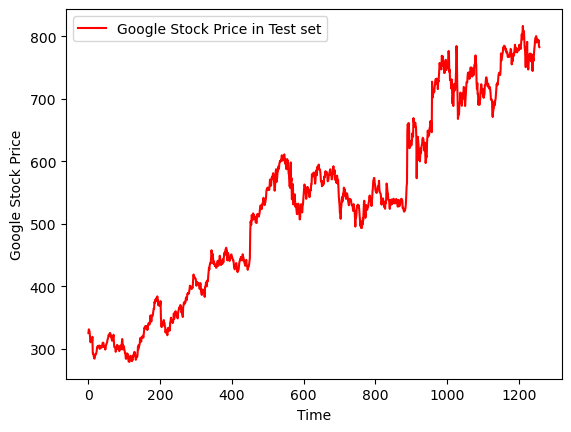

In [7]:
#Visualizing the Data
plt.plot(training_set, color = 'red', label = 'Google Stock Price in Test set')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

### Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [9]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
# Reshaping for LSTM input: (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Building the LSTM model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

In [12]:
# Adding the first LSTM layer and some Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

C:\Users\nishi\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Adding the second LSTM layer and Dropout regularization
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

In [14]:
# Adding the third LSTM layer and Dropout regularization
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

In [15]:
# Adding the fourth LSTM layer and Dropout regularization
model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [16]:
# Adding the output layer
model.add(Dense(units=1))

In [17]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# Fitting the model to the Training set
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 156ms/step - loss: 0.0894
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - loss: 0.0073
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - loss: 0.0066
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - loss: 0.0050
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - loss: 0.0054
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - loss: 0.0045
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - loss: 0.0044
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - loss: 0.0062
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - loss: 0.0046
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0044
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - loss: 0.0049
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - loss: 0.0054
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - loss: 0.0059
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 0.0042
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/

### Fitting the model to the Training set

In [19]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0027
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - loss: 0.0022
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - loss: 0.0028
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - loss: 0.0025
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 0.0025
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - loss: 0.0020
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - loss: 0.0021
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - loss: 0.0020
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - loss: 0.0020
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - loss: 0.0020
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - loss: 0.0019
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - loss: 0.0023
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - loss: 0.0020
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - loss: 0.0024
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/

### Making the predictions and visualizing the results

In [21]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [22]:
# Getting the predicted stock price
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 60 + len(dataset_test)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


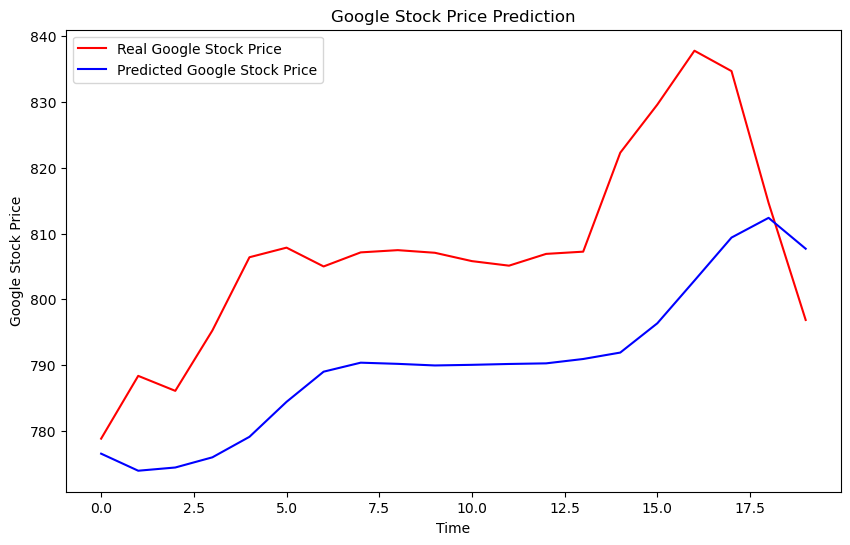

In [23]:
# Visualizing the results
plt.figure(figsize=(10,6))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()